In [21]:
import cptac
import cptac.utils as u
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
en = cptac.Endometrial()

In [4]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")

In [47]:
def plot_trans(gene, pval):
    plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
    sns.set(font_scale = 1.2)

    boxplot = sns.boxplot(x='Mutation', y=gene,
                         order=['Wildtype_Tumor', 'Missense_Mutation'],
                         data=proteomics,
                         showfliers=False)

    boxplot.set_title("PIK3CA missense effections on " + gene + " Proteomic Abundance in Endometrial")
    boxplot = sns.stripplot(x='Mutation', y=gene, data=proteomics, jitter=True)
    boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+" Proteomics")

    format_pval_annotation('* P-vlaue = '+pval, 0, 1, 1)

    plt.show()
    plt.clf()
    plt.close()

In [5]:
gene = 'PIK3CA'

In [6]:
#Prioritize hotspot mutations
endo = en.get_genotype_all_vars(gene, mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [49]:
#pull out all the missense mutation and wildtype tumors 
missense = endo.loc[(endo['Mutation'] == "Missense_Mutation") | (endo['Mutation'] == "Wildtype_Tumor")]

In [50]:
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])

In [9]:
prot = en.get_proteomics() #get proteomics
#probably need to filter these down

In [51]:
proteomics = missense.join(prot) #join proteomics to mutations
# proteomics

# Trans effects of 64 genes

# Trans effects for AKT

Name         AAAS                  AACS  AAED1 AAGAB          AAK1         \
Site         S495    S541   Y485   S618    S12  S310   S311    S14    S18   
Patient_ID                                                                  
C3L-00006     NaN     NaN    NaN -0.881 -1.810   NaN    NaN    NaN -0.242   
C3L-00008     NaN     NaN    NaN    NaN  0.084   NaN    NaN -1.110 -0.383   
C3L-00032  -0.202     NaN    NaN    NaN -1.880   NaN    NaN    NaN  0.382   
C3L-00090  -0.002     NaN -0.407    NaN    NaN   NaN    NaN    NaN    NaN   
C3L-00098   0.556 -0.0461    NaN    NaN  0.941   NaN  0.429  0.362  0.697   

Name                ...     ZZZ3                                            \
Site           S20  ...     S397 S411 S420   S424     S426 S468   S89 T415   
Patient_ID          ...                                                      
C3L-00006  -0.2420  ...  0.18400  NaN  NaN    NaN -0.20500  NaN   NaN  NaN   
C3L-00008  -1.0900  ... -0.17100  NaN  NaN -0.393 -0.17100  NaN  0.29  NaN   
C3L-00032  -0.0416  ...      NaN  NaN  NaN    NaN      NaN  NaN   NaN  NaN   
C3L-00090  -0.5550  ...  0.13970  NaN  NaN    NaN -0.55900  NaN   NaN  NaN   
C3L-00098  -0.0529  ... -0.15875  NaN  NaN  0.196  0.06175  NaN   NaN  NaN   

Name                        
Site          T418    Y399  
Patient_ID                  
C3L-00006      NaN     NaN  
C3L-00008   0.1605 -0.0635  
C3L-00032      NaN     NaN  
C3L-00090      NaN  0.2980  
C3L-00098      NaN -0.2900  

[5 rows x 73212 columns]

In [65]:
phos['MTOR']

Site,S1261,S1821,S1849,S1851,S2069,S2450,S2454,S2478,S2481,T1826,T1829,T1834,T1837,T1844,T2471,T2473,T2474,Y2449
Patient_ID,,,,,,,,,,,,,,,,,,
C3L-00006,0.6350,0.99800,0.998,NaN,NaN,0.251,NaN,0.19500,0.1950,NaN,NaN,0.99800,NaN,NaN,NaN,NaN,NaN,0.00353
C3L-00008,NaN,-0.02335,NaN,0.07630,NaN,NaN,NaN,0.24100,0.2410,NaN,NaN,-0.02335,-0.29100,-0.29100,NaN,NaN,NaN,NaN
C3L-00032,0.0346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00090,0.0947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00098,0.3810,0.47000,NaN,NaN,NaN,NaN,NaN,-1.12000,-0.6525,NaN,NaN,0.47000,NaN,NaN,-0.1850,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NX5.N,0.0637,-0.00614,NaN,-0.00799,NaN,NaN,NaN,0.16655,0.0501,NaN,NaN,0.17958,NaN,NaN,0.6965,1.110,1.110,NaN
NX6.N,0.3490,0.26800,NaN,0.05550,NaN,NaN,NaN,0.61200,0.4740,NaN,NaN,0.20600,NaN,NaN,0.8275,0.905,0.905,NaN
NX7.N,-0.5430,-0.76100,NaN,-0.54600,NaN,NaN,NaN,-0.02850,-0.2740,NaN,NaN,-1.03050,NaN,NaN,0.4390,0.661,0.661,NaN


In [75]:
gene1_filter = phos.columns.get_level_values("Name").str.startswith("AKT") # Select all columns where the gene starts with "AA". This will grab every column where the key "Name" starts with AA
gene1_data = phos.loc[:, gene1_filter]
gene1_data.head()

Name        AKT1                                     AKT1S1                 \
Site        S122     S124    S126     S129     T450    S108    S112   S203   
Patient_ID                                                                   
C3L-00006    NaN -0.04605  0.1481 -0.04605      NaN  0.0879  0.0879 -0.858   
C3L-00008  -0.25 -0.26300 -0.1210 -0.18550 -0.00876  0.4525  0.4070  3.440   
C3L-00032    NaN  0.21400  0.0505  0.03195      NaN     NaN     NaN    NaN   
C3L-00090    NaN -0.00300 -0.0282  0.04540      NaN  0.7890  0.6350  1.240   
C3L-00098    NaN -0.18965 -0.0393 -0.07715 -0.30100  0.0525  0.2160 -1.840   

Name                         ... AKT2                         AKT3            \
Site          S222     S223  ... S474   T133   T449     T451   S34 T122 T445   
Patient_ID                   ...                                               
C3L-00006   0.5620  0.26000  ...  NaN    NaN    NaN -0.35000   NaN  NaN  NaN   
C3L-00008  -0.1695 -0.16950  ...  NaN  0.777    NaN  0.19400 -1.16  NaN  NaN   
C3L-00032   0.6810  0.12800  ...  NaN    NaN    NaN  0.17400   NaN  NaN  NaN   
C3L-00090   0.2850  0.36500  ...  NaN    NaN    NaN  0.01320   NaN  NaN  NaN   
C3L-00098   0.2670 -0.01684  ...  NaN    NaN  0.167  0.81615   NaN  NaN  NaN   

Name                 AKTIP         
Site           T447    S30    T34  
Patient_ID                         
C3L-00006  -0.49900  0.662    NaN  
C3L-00008  -0.73100    NaN    NaN  
C3L-00032   0.00275    NaN  0.593  
C3L-00090  -1.56000  0.368 -0.366  
C3L-00098  -0.78600    NaN    NaN  

[5 rows x 33 columns]

In [34]:
#now we want to iterate through each gene and get compare??
prot_col = list(proteomics.loc[:, proteomics.columns.str.startswith('AKT')])

In [35]:
u.wrap_ttest(proteomics, 'Mutation', prot_col, return_all = True)

,Comparison,P_Value
0,AKTIP,0.044791
1,AKT2,0.076475
2,AKT1,0.089279
3,AKT3,0.236638
4,AKT1S1,0.892097


In [22]:
gene = 'PTEN'

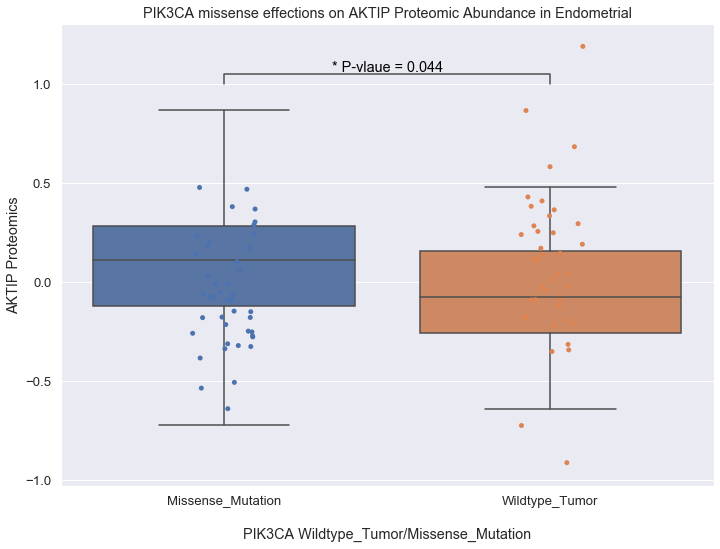

In [46]:
plot_trans('AKTIP', "0.044")

# Trans effects for mTOR

In [59]:
u.wrap_ttest(proteomics, 'Mutation', ['MTOR'], return_all = True)

,Comparison,P_Value
0,MTOR,0.298577


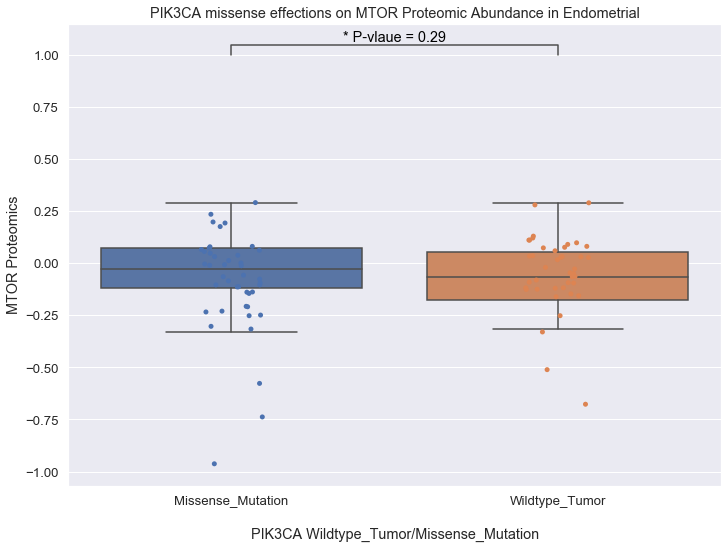

In [60]:
plot_trans('MTOR', "0.29")